In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Coding a basic layer

In [2]:
weights = [[0.2,0.4,0.1],[-0.4,0.5,0.9],[0.8,0.3,0.1]]
bias = [3,4,2]
inputs = [1,2,3]

layer_outputs = []

for w , b in zip(weights, bias):
    neuron_output = 0
    for n_inputs, w1 in zip(inputs,w):
        neuron_output += n_inputs * w1
    neuron_output += b
    layer_outputs.append(neuron_output)

print(layer_outputs)

[4.3, 7.300000000000001, 3.7]


In [3]:
## Shortened version using numpy

import numpy as np

weights = np.array([[0.2, 0.4, 0.1], [-0.4, 0.5, 0.9], [0.8, 0.3, 0.1]])
bias = np.array([3, 4, 2])
inputs = np.array([1, 2, 3])

layer_outputs = np.dot(weights, inputs) + bias
print(layer_outputs)

[4.3 7.3 3.7]


In [4]:
## Using transpose

weights = np.array([[0.2, 0.4, 0.1], [-0.4, 0.5, 0.9], [0.8, 0.3, 0.1]])
bias = np.array([3, 4, 2])
inputs = np.array([[3,4,1],[1,2,3],[2,1,4]])

layer_outputs = np.dot(weights, inputs.T) + bias
print(layer_outputs)

[[5.3 5.3 3.2]
 [4.7 7.3 5.3]
 [6.7 5.7 4.3]]


In [5]:
# make layer2

weights2 = np.array([[0.1, 0.3, 0.2], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]])
bias2 = np.array([1, 2, 3])

layer_outputs2 = np.dot(weights2, layer_outputs.T) + bias2
print(layer_outputs2)

[[ 3.76  5.72  6.24]
 [ 7.69 10.71 11.11]
 [11.83 15.9  16.12]]


In [6]:
# Create a Layer class

np.random.seed(0)  # For reproducibility

class Layer_Dense:
    def __init__(self, n_inputs1, n_neurons):
        self.weights = 0.1 * np.random.rand(n_inputs1, n_neurons)
        self.biases = np.zeros((1, n_neurons))  # Corrected line

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

inp1 = np.array([[1,2,3,4],[5,4,5,6],[1,7,8,9]])
layer1 = Layer_Dense(4,3)
layer2 = Layer_Dense(3,2)
layer1.forward(inp1)
print(layer1.output)

layer2.forward(layer1.output)
print(layer2.output)

[[0.44851076 0.74047181 0.69011196]
 [0.94121854 1.44797813 1.35890767]
 [1.13146671 1.79404823 1.75933785]]
[[0.03213273 0.10542578]
 [0.06649877 0.21288035]
 [0.08057366 0.26684556]]


In [7]:
# Hidden Layer activation function

# ReLU / Sigmoid 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def Relu(x):
    return np.maximum(0,x)

In [8]:
class Activation_Relu:
    def __init__(self):
        pass
    def forward(self,inputs):
        self.output = Relu(inputs)

class Activation_Sigmoid:
    def __init__(self):
        pass
    def forward(self,inputs):
        self.output = sigmoid(inputs)


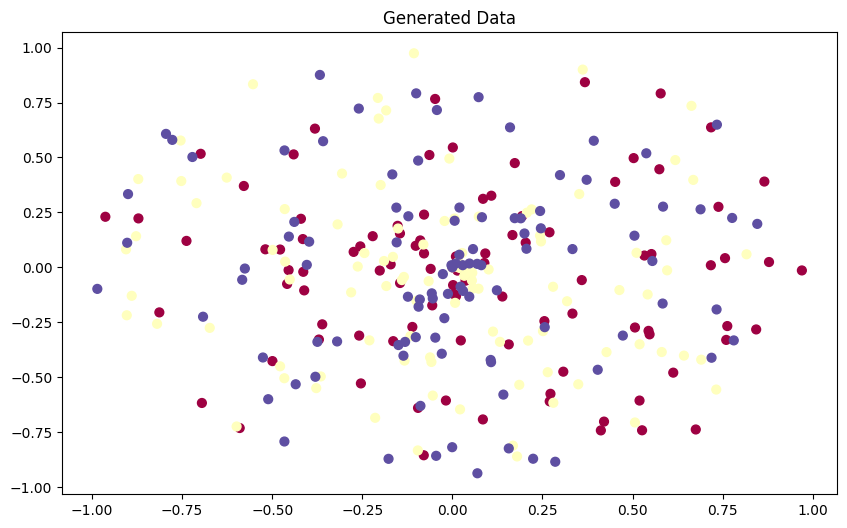

In [9]:
# Generate Random Data

def create_data(points,classes):
    X = np.zeros((points*classes,2))
    y = np.zeros(points*classes, dtype='uint8')
    for classin in range(classes):
        ix = range(points*classin, points*(classin+1))
        r = np.linspace(0.0, 1, points)
        t = np.linspace(classin*4, (classin+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2*np.pi), r*np.cos(t*2*np.pi)]
        y[ix] = classin
    return X, y

X,y = create_data(100,3)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Generated Data")
plt.show()

In [10]:
# Using a single layer first

layer1 = Layer_Dense(2,3)
a1 = Activation_Relu()
layer1.forward(X)
a1.forward(layer1.output)
print(a1.output[:5])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.25609277e-04 7.45904408e-05 2.08797187e-04]
 [2.21824778e-04 0.00000000e+00 0.00000000e+00]
 [2.03682753e-03 2.29040004e-04 6.91435099e-04]
 [2.72951399e-03 1.76227824e-04 2.26335685e-04]]


In [11]:
import math 
e = math.e

# Testing the exp

layer_op1 = [2.1,3.5,1.2,-1.3,0,-0.4]

exp = np.exp(layer_op1)

# Normalization
norm = exp / np.sum(exp)

print(norm)

[0.17544831 0.71147799 0.07133196 0.00585528 0.02148477 0.01440167]


In [12]:
class Activation_Softmax_Demo:
    def __init__(self):
        pass
    
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))  # Stability improvement
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

In [13]:
layer_op2 = [[4.8,1.21,2.385],[8.9,-1.81,0.2],[1.41,1.051,0.026]]
exp1 = np.exp(layer_op2)

norm1 = exp1 / np.sum(exp1, axis=1, keepdims=True)
print(norm1)


# Overflow prevention in softmax
layer_op2 = [[4.8,1.21,2.385],[8.9,-1.81,0.2],[1.41,1.051,0.026]]



[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


In [14]:
# Creating a softmax layer class
class Activation_Softmax:
    def __init__(self):
        pass
    
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))  # Stability improvement
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

In [15]:
X1,y1 = create_data(100,3)

layer1 = Layer_Dense(2,3)
a1 = Activation_Relu()

layer2 = Layer_Dense(3,3)
a2 = Activation_Softmax()

layer1.forward(X1)
a1.forward(layer1.output)
layer2.forward(a1.output)
a2.forward(layer2.output)

print(a2.output[:5])

[[0.33333333 0.33333333 0.33333333]
 [0.33333159 0.33333676 0.33333165]
 [0.33332288 0.33335697 0.33332016]
 [0.33332658 0.33334915 0.33332427]
 [0.33332441 0.33335329 0.3333223 ]]


In [17]:
class Loss:
    def __init__(self):
        pass
    def calculate(self, output, y_true):
        sample_losses = self.forward(output,y_true)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_CategoricalCrossentropy(Loss):
    def __init__(self):
        super().__init__()
    
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)  # Prevent division by zero
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [18]:
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(a2.output, y1)
print("Loss:", loss)

Loss: 1.098629546582559
